In [8]:
import sys
sys.path.append('..')

In [9]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import src.generation

### 1. Загрузка и осмотр данных

In [10]:
df = src.generation.generate_dataframe()
print(df.shape)
df.head()


(1000, 17)


/Users/georgijhabner/Desktop/eda/notebooks/../src/generation.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Дата окончания контракта': pd.date_range(start='2020-01-01', periods=1000, freq='M').astype(str)


,Возраст,Зарплата,Стаж,Город,Пол,Образование,Профессия,Компания,Отрасль,Уровень удовлетворенности,Количество проектов,Стаж в текущей компании,Премиальные,Бонусы,Оценка работы,Дата начала работы,Дата окончания контракта
0,NaN,146588.438236,445.310472,NaN,Муж.,NaN,Техник,Nornickel,NaN,5.052127,-549.155835,NaN,NaN,32165.148648,1.855418,NaN,2020-01-31
1,NaN,35230.875175,345.782925,Новосибирск,NaN,NaN,Аналитик,Yandex.Cloud,Цифровые технологии,3.292738,NaN,4.0,NaN,34348.917687,NaN,NaN,NaN
2,32.0,65387.000000,-304.620499,NaN,NaN,Среднее общее,Дизайнер,Yandex.Cloud,Технологии,4.166964,NaN,11.0,91435.841243,47079.538993,9.823729,NaN,2020-03-31
3,NaN,37879.136601,-634.737433,Нижний Новгород,NaN,Среднее общее,NaN,NaN,Искусственный интеллект,7.350538,142.617256,NaN,168858.616304,36604.807125,5.909110,NaN,2020-04-30
4,25.0,31421.911496,245.244336,Нижний Новгород,Жен.,Среднее общее,Инженер,Yandex.Cloud,NaN,5.693959,NaN,13.0,NaN,37634.140174,9.550622,2020-01-05,2020-05-31


* Информация о типах данных и количестве пропусков

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Возраст                    690 non-null    float64
 1   Зарплата                   714 non-null    float64
 2   Стаж                       702 non-null    float64
 3   Город                      694 non-null    object 
 4   Пол                        715 non-null    object 
 5   Образование                704 non-null    object 
 6   Профессия                  684 non-null    object 
 7   Компания                   689 non-null    object 
 8   Отрасль                    699 non-null    object 
 9   Уровень удовлетворенности  697 non-null    float64
 10  Количество проектов        680 non-null    float64
 11  Стаж в текущей компании    709 non-null    float64
 12  Премиальные                679 non-null    float64
 13  Бонусы                     711 non-null    float6

* Выявление иных представлений пустых значений, кроме NaN

In [12]:
print(((df == " ") | (df == "0") | (df == 0) | (df == "пропуск") | (df == "Пропуск")).sum())


Возраст                      0
Зарплата                     0
Стаж                         0
Город                        0
Пол                          0
Образование                  0
Профессия                    0
Компания                     0
Отрасль                      0
Уровень удовлетворенности    0
Количество проектов          0
Стаж в текущей компании      0
Премиальные                  0
Бонусы                       0
Оценка работы                0
Дата начала работы           0
Дата окончания контракта     0
dtype: int64


* Осмотр уникальных значений и дубликатов

In [13]:
print(df.duplicated().sum())
df.nunique()

0


Возраст                       47
Зарплата                     714
Стаж                         690
Город                         10
Пол                            2
Образование                    1
Профессия                      7
Компания                      10
Отрасль                       10
Уровень удовлетворенности    697
Количество проектов          675
Стаж в текущей компании       14
Премиальные                  679
Бонусы                       711
Оценка работы                704
Дата начала работы           704
Дата окончания контракта     718
dtype: int64

Можно заметить, что данных об образовании крайне мало

* Основные статистические характеристики

In [14]:
df.describe()

,Возраст,Зарплата,Стаж,Уровень удовлетворенности,Количество проектов,Стаж в текущей компании,Премиальные,Бонусы,Оценка работы
count,690.000000,714.000000,702.000000,697.000000,680.000000,709.000000,679.000000,711.000000,704.000000
mean,41.039130,88292.677418,3.181731,5.388452,34.966581,7.661495,126290.416167,30084.272720,5.503593
std,13.422461,34560.483287,492.759723,2.679520,470.421803,4.213705,43375.389294,11361.770672,2.587086
min,18.000000,30072.687902,-997.000000,1.005648,-999.000000,1.000000,50236.913162,10108.048673,1.001667
25%,29.000000,58161.974564,-351.155767,3.000545,-302.352505,4.000000,91269.179068,20499.603880,3.335268
50%,42.000000,86732.053617,-4.189836,5.386657,26.143083,8.000000,125087.133417,30409.883992,5.402651
75%,52.000000,116896.517953,372.884762,7.680689,341.777429,11.000000,164621.937289,39771.714711,7.740367
max,64.000000,149936.092512,1029.000000,9.998643,1049.000000,14.000000,199956.145673,49979.854017,9.984497


### 2. Проверка и обработка пропусков

Предварительный перевод дат в формат `datetime`

In [15]:
df['Дата начала работы'] = pd.to_datetime(df['Дата начала работы'])
df['Дата окончания контракта'] = pd.to_datetime(df['Дата окончания контракта'])

In [16]:
print(df.isna().sum())

# заполнение числовых колонок с помощью KNN
numeric_cols = df.select_dtypes(include=[np.number]).columns

# временная табличка для числовых колонок
df_numeric = df[numeric_cols]

imputer = KNNImputer(n_neighbors=5)
df_numeric = imputer.fit_transform(df_numeric)
df_imputed_numeric = pd.DataFrame(df_numeric, columns=numeric_cols)

df[numeric_cols] = df_imputed_numeric

# заполнение категориальных колонок с помощью моды
categorial_cols = df.select_dtypes(include=[object]).columns
df[categorial_cols] = df[categorial_cols].fillna(df[categorial_cols].mode().iloc[0])

# заполнение дат
date_cols = df.select_dtypes(include=[np.datetime64]).columns

df[date_cols] = df[date_cols].fillna(df[date_cols].mode().iloc[0])


Возраст                      310
Зарплата                     286
Стаж                         298
Город                        306
Пол                          285
Образование                  296
Профессия                    316
Компания                     311
Отрасль                      301
Уровень удовлетворенности    303
Количество проектов          320
Стаж в текущей компании      291
Премиальные                  321
Бонусы                       289
Оценка работы                296
Дата начала работы           296
Дата окончания контракта     282
dtype: int64


In [17]:
print(df.isna().sum())

Возраст                      0
Зарплата                     0
Стаж                         0
Город                        0
Пол                          0
Образование                  0
Профессия                    0
Компания                     0
Отрасль                      0
Уровень удовлетворенности    0
Количество проектов          0
Стаж в текущей компании      0
Премиальные                  0
Бонусы                       0
Оценка работы                0
Дата начала работы           0
Дата окончания контракта     0
dtype: int64


### 3. Анализ числовых признаков

array([[<Axes: title={'center': 'Возраст'}>,
        <Axes: title={'center': 'Зарплата'}>,
        <Axes: title={'center': 'Стаж'}>],
       [<Axes: title={'center': 'Уровень удовлетворенности'}>,
        <Axes: title={'center': 'Количество проектов'}>,
        <Axes: title={'center': 'Стаж в текущей компании'}>],
       [<Axes: title={'center': 'Премиальные'}>,
        <Axes: title={'center': 'Бонусы'}>,
        <Axes: title={'center': 'Оценка работы'}>]], dtype=object)

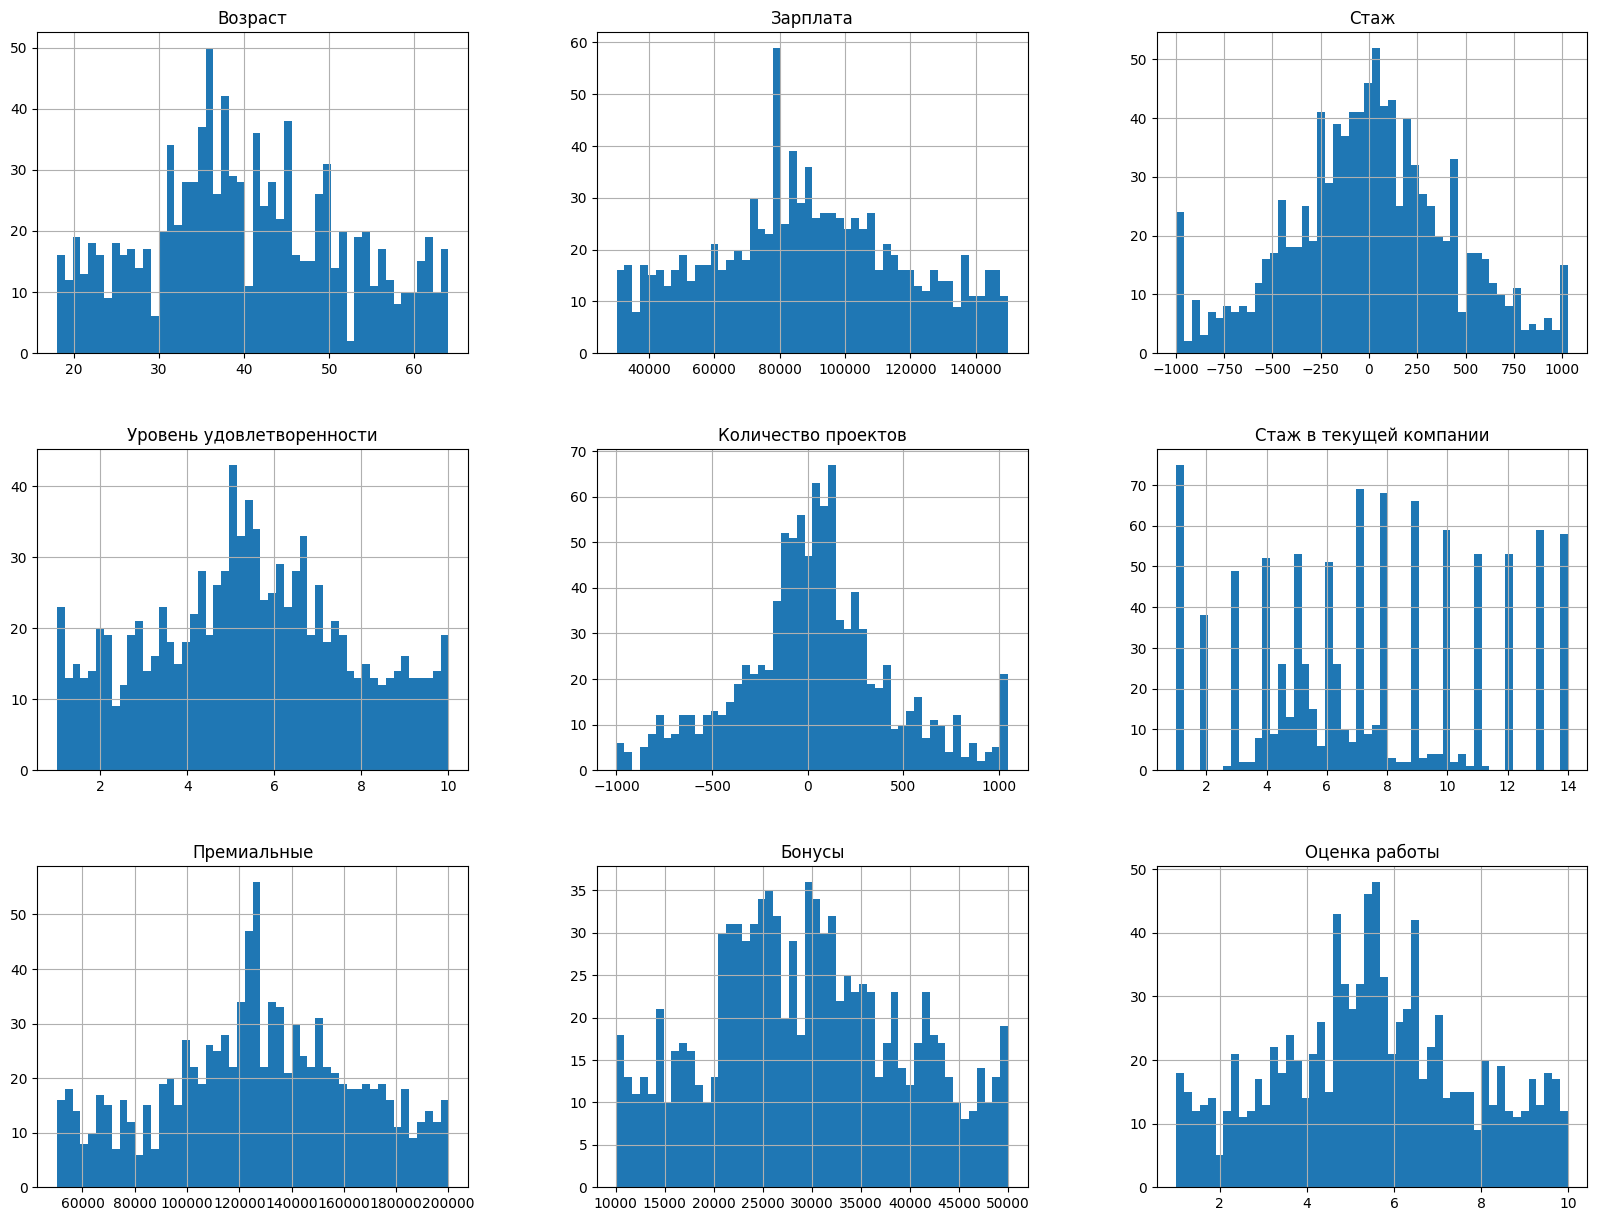

In [18]:
df[numeric_cols].hist(figsize=(20, 15), bins=50)


Заметим что в столбцах `Количество проектов` и `Стаж` работы в компании есть отрицательные значения, что является ошибкой. Заполним их с помощью KNN

In [19]:
neg_columns = ['Количество проектов', 'Стаж']
df[neg_columns] = df[neg_columns].applymap(lambda x: np.nan if x < 0 else x)

df_neg = imputer.fit_transform(df[neg_columns])
df_imputed_neg = pd.DataFrame(df_neg, columns=neg_columns)

df[neg_columns] = df_imputed_neg


/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/ipykernel_51257/2323315219.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[neg_columns] = df[neg_columns].applymap(lambda x: np.nan if x < 0 else x)


* Нормализация данных

In [20]:
# normalizing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


array([[<Axes: title={'center': 'Возраст'}>,
        <Axes: title={'center': 'Зарплата'}>,
        <Axes: title={'center': 'Стаж'}>],
       [<Axes: title={'center': 'Уровень удовлетворенности'}>,
        <Axes: title={'center': 'Количество проектов'}>,
        <Axes: title={'center': 'Стаж в текущей компании'}>],
       [<Axes: title={'center': 'Премиальные'}>,
        <Axes: title={'center': 'Бонусы'}>,
        <Axes: title={'center': 'Оценка работы'}>]], dtype=object)

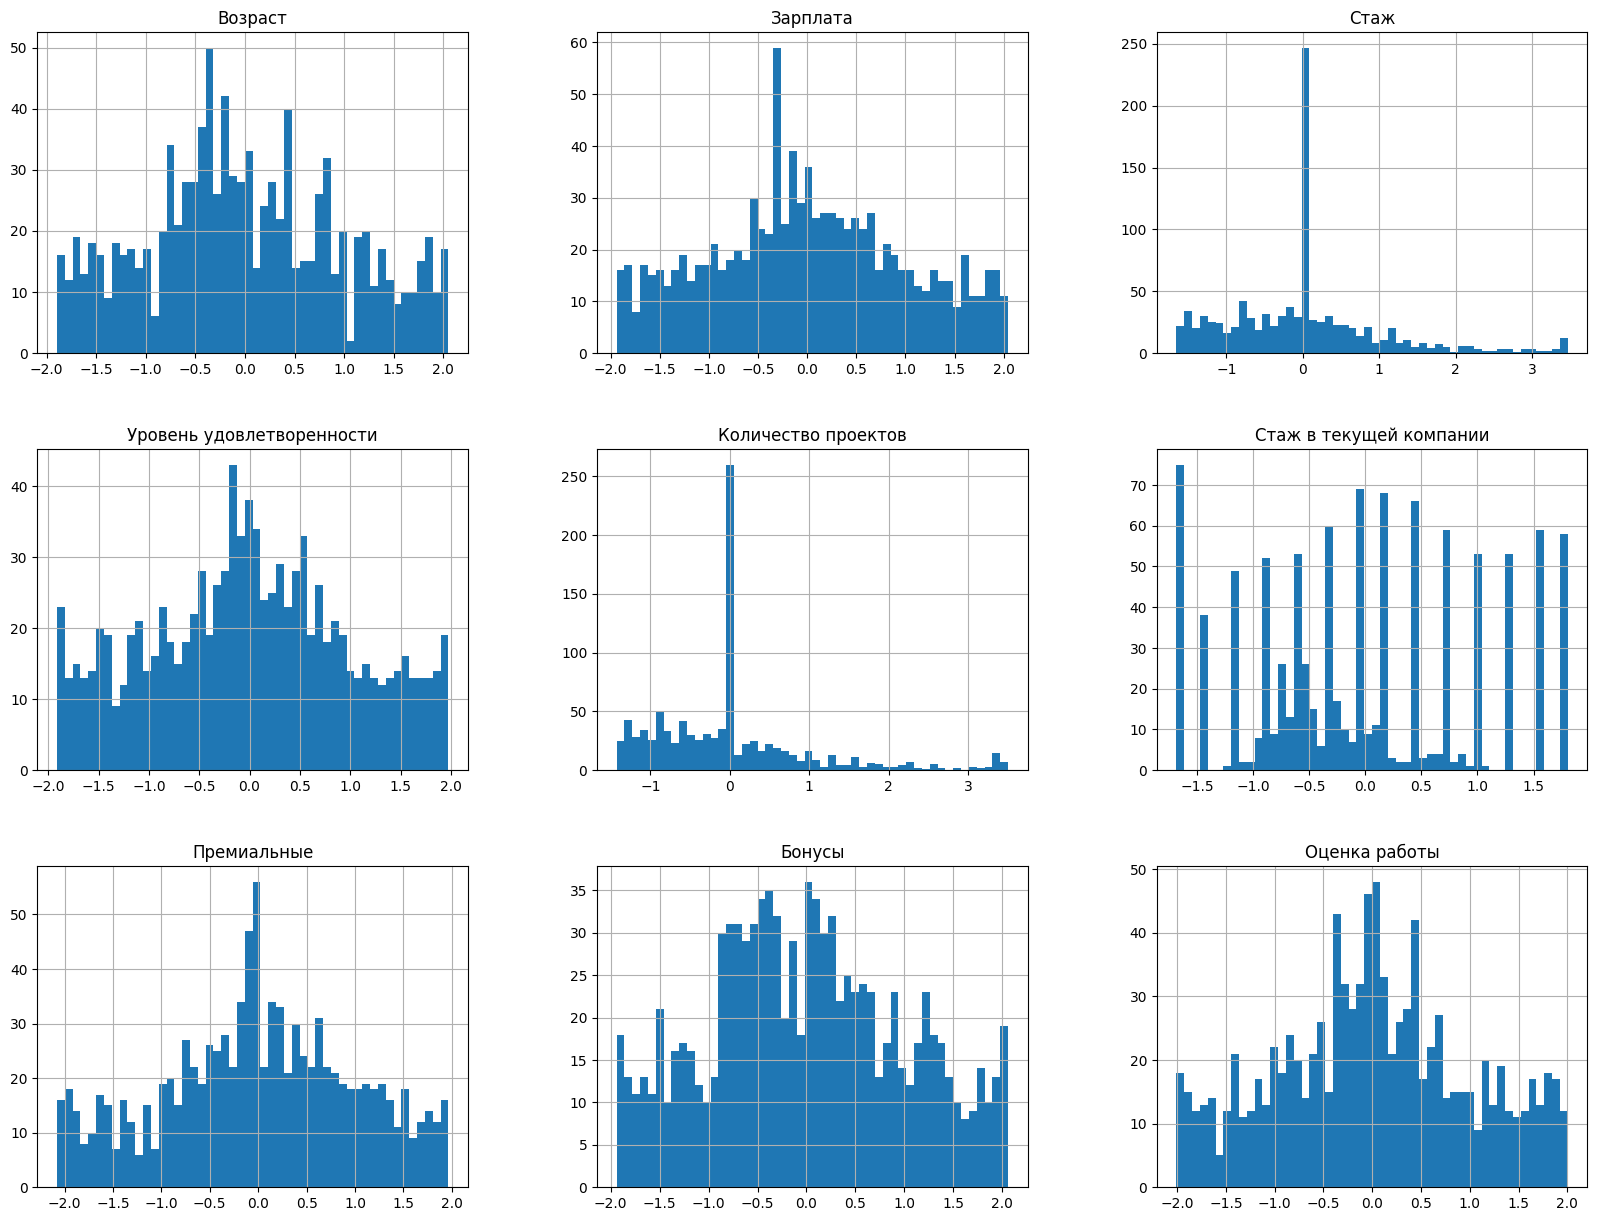

In [21]:
df[numeric_cols].hist(figsize=(20, 15), bins=50)

Избавимся от выбросов в колонках `Стаж` и `Количество проектов`

In [22]:
df = df[df['Стаж'] < df['Стаж'].quantile(0.95)]
df = df[df['Количество проектов'] < df['Количество проектов'].quantile(0.92)]

Вычислим коэффициент ассиметрии

Возраст                      0.126943
Зарплата                     0.079135
Стаж                         0.147357
Уровень удовлетворенности    0.014902
Количество проектов          0.185584
Стаж в текущей компании      0.089863
Премиальные                 -0.134946
Бонусы                       0.125255
Оценка работы               -0.010048
dtype: float64


<Axes: >

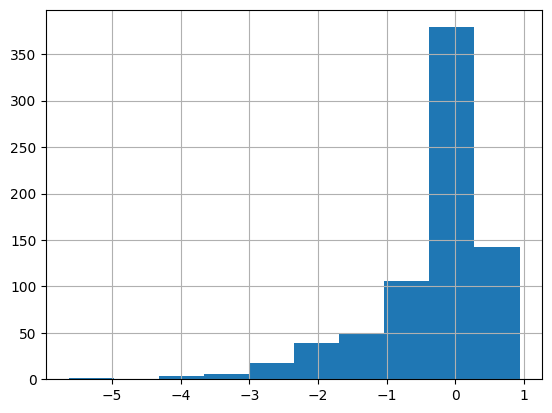

In [23]:
from scipy.stats import skew

skewness = df[numeric_cols].apply(lambda x: skew(x))
print(skewness)

df['Количество проектов'].apply(np.log1p).hist()

<Axes: >

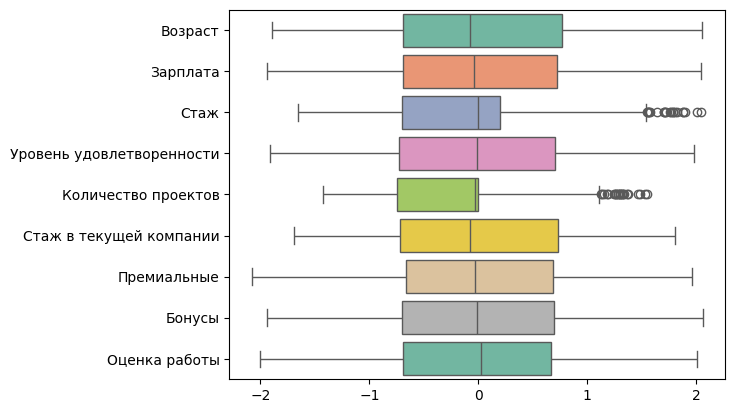

In [24]:
sns.boxplot(data=df, orient='h', palette='Set2')

Удалим дубликаты, которые могли возникнуть после заполнения пропусков

In [25]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.shape

(874, 17)

### 4. Анализ категориальных признаков

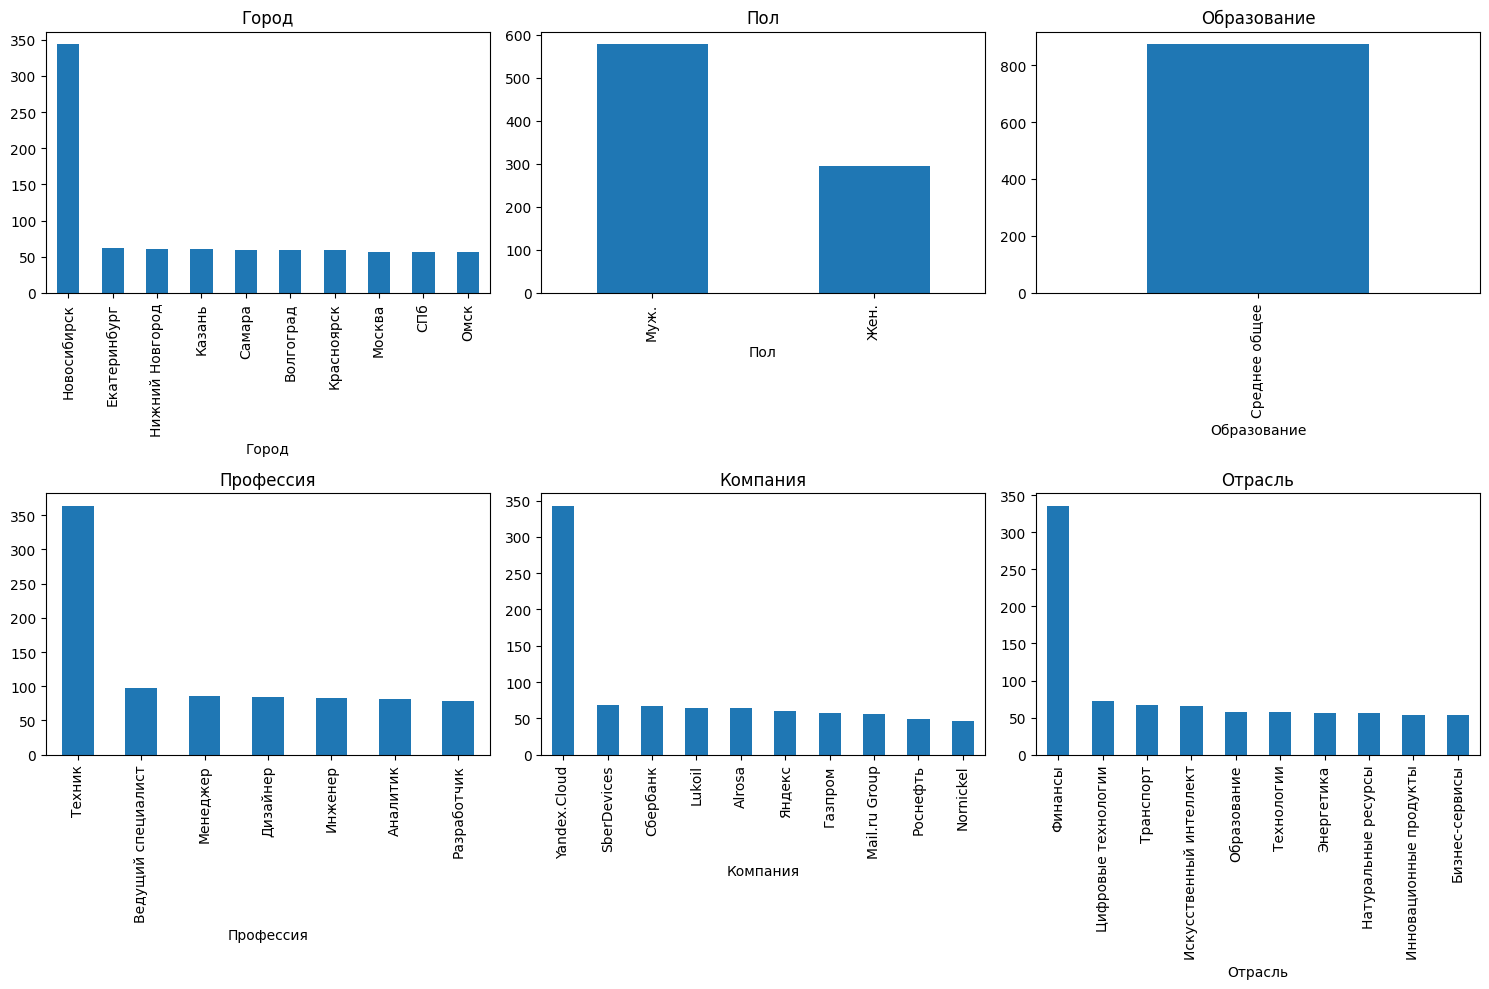

In [26]:
fig, axs = plt.pyplot.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['object']).columns):
    df[col].value_counts().plot(kind='bar', ax=axs[i // 3, i % 3], title=col)
plt.pyplot.tight_layout()



### 5. Временные признаки

Заметим, что в процессе заполнения данных появились выбросы

array([[<Axes: title={'center': 'Дата начала работы'}>,
        <Axes: title={'center': 'Дата окончания контракта'}>]],
      dtype=object)

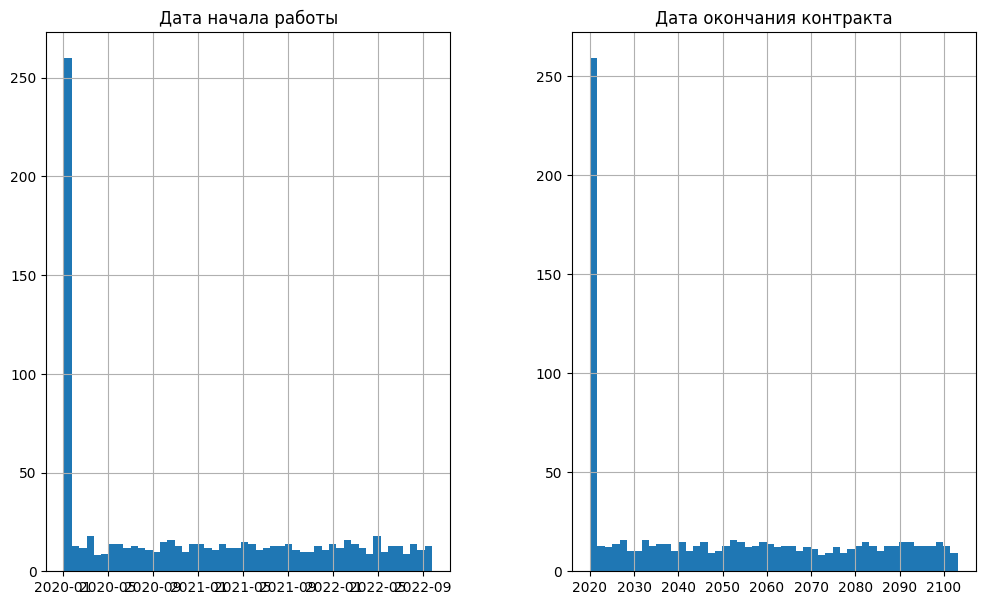

In [27]:
df[date_cols].hist(figsize=(12, 7), bins=50)

Добаим дополнительные признаки

In [28]:
df['Длительность контракта'] = (df['Дата окончания контракта'] - df['Дата начала работы']).dt.days
df['Год начала'] = df['Дата начала работы'].dt.year
df['Месяц начала'] = df['Дата начала работы'].dt.month
df['День недели начала'] = df['Дата начала работы'].dt.dayofweek

### 6. Корреляционный анализ

#### Корреляция между числовыми признаками

<Axes: >

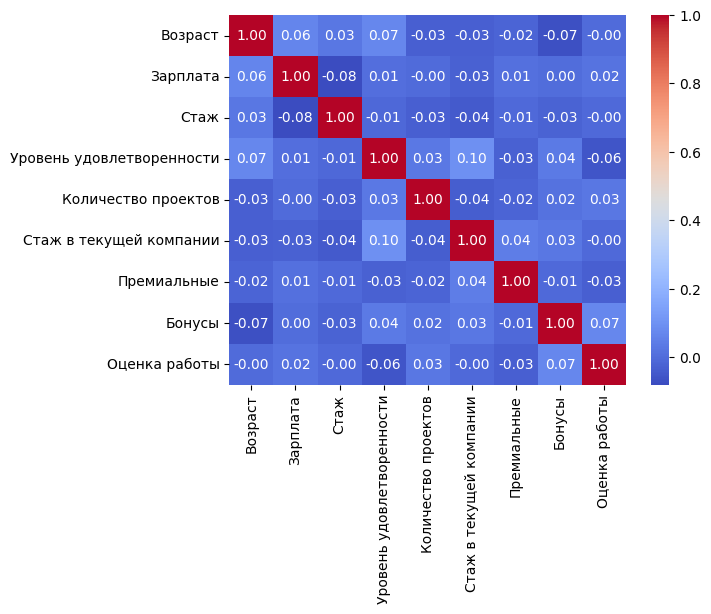

In [29]:
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')

#### Корреляция между категориальными признаками

/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/ipykernel_51257/2343193983.py:14: RuntimeWarning: invalid value encountered in scalar divide
  cramers_v = (phi2 / min(k - 1, r - 1)) ** 0.5
/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/ipykernel_51257/2343193983.py:14: RuntimeWarning: invalid value encountered in scalar divide
  cramers_v = (phi2 / min(k - 1, r - 1)) ** 0.5
/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/ipykernel_51257/2343193983.py:14: RuntimeWarning: invalid value encountered in scalar divide
  cramers_v = (phi2 / min(k - 1, r - 1)) ** 0.5
/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/ipykernel_51257/2343193983.py:14: RuntimeWarning: invalid value encountered in scalar divide
  cramers_v = (phi2 / min(k - 1, r - 1)) ** 0.5
/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/ipykernel_51257/2343193983.py:14: RuntimeWarning: invalid value encountered in scalar divide
  cramers_v = (phi2 / min(k - 1, r - 1)) ** 0.5
/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/i

<Axes: >

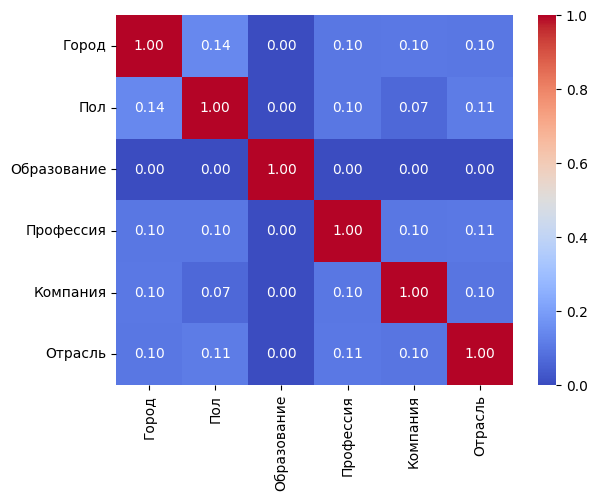

In [30]:
from scipy.stats import chi2_contingency

# Создание таблицы сопряженности
categorial_corr = pd.DataFrame(index=categorial_cols, columns=categorial_cols)

for col1 in categorial_cols:
    for col2 in categorial_cols:
        if col1 != col2:
            contingency_table = pd.crosstab(df[col1], df[col2])
            chi2, _, _, _ = chi2_contingency(contingency_table)
            n = contingency_table.sum().sum()
            phi2 = chi2 / n
            r, k = contingency_table.shape
            cramers_v = (phi2 / min(k - 1, r - 1)) ** 0.5
            categorial_corr.loc[col1, col2] = cramers_v.astype(float) if not np.isnan(cramers_v) else 0
        else:
            categorial_corr.loc[col1, col2] = 1

categorial_corr = categorial_corr.astype(float)
sns.heatmap(categorial_corr, annot=True, fmt=".2f", cmap='coolwarm')   

#### Корреляция между числовыми (датами) и категориальными признаками

<Axes: >

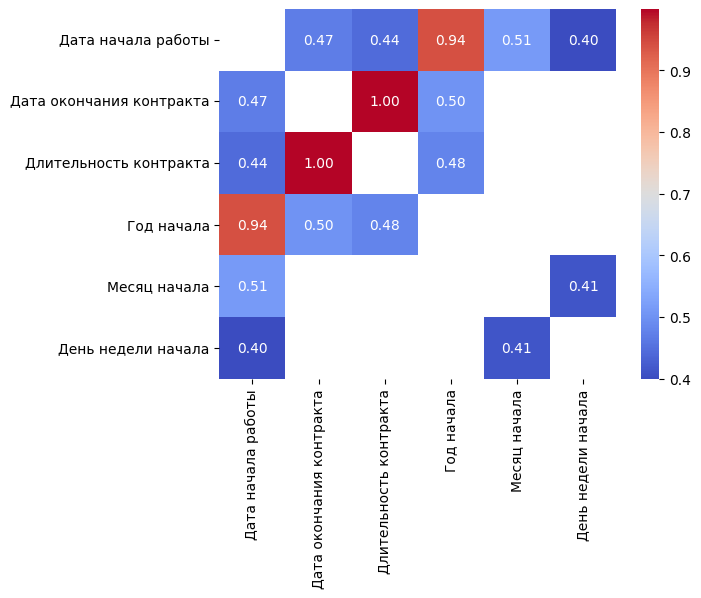

In [31]:
df_with_dummies = pd.get_dummies(df, columns=categorial_cols)

correlation_matrix = df_with_dummies.corr()

# Выбор наиболее коррелирующих признаков
correlation_matrix = correlation_matrix.abs()
correlation_matrix = correlation_matrix[correlation_matrix > 0.3]
correlation_matrix = correlation_matrix[correlation_matrix < 1]
correlation_matrix = correlation_matrix.dropna(axis=0, how='all')
correlation_matrix = correlation_matrix.dropna(axis=1, how='all')

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

Видим, что есть корреляция между датой начала и оконачания работы в компании

### 7. Анализ целевой переменной

<Axes: xlabel='Оценка работы', ylabel='Count'>

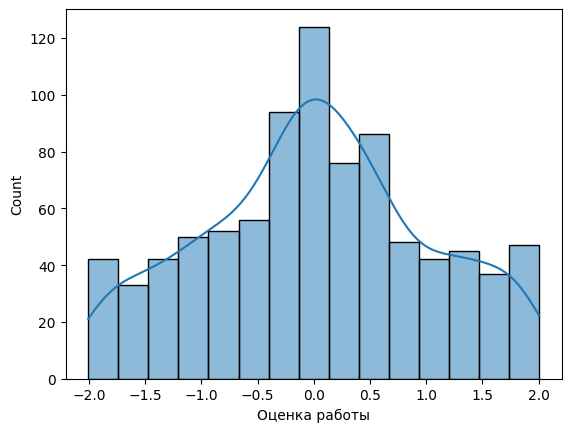

In [32]:
sns.histplot(df['Оценка работы'], kde=True)

<Axes: xlabel='Уровень удовлетворенности', ylabel='Count'>

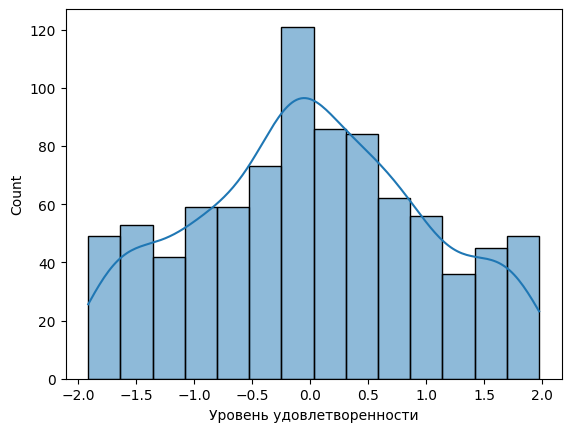

In [33]:
sns.histplot(df['Уровень удовлетворенности'], kde=True)